 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/ipython-notebooks/research/NetworkX%20Lattices/Lattices%20With%20NetworkX%20-%20Part%202%2C%20Lattice%20Hamiltonians.ipynb#Lattice-Hamiltonians-with-QuTiP" data-toc-modified-id="Lattice-Hamiltonians-with-QuTiP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lattice Hamiltonians with QuTiP</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/ipython-notebooks/research/NetworkX%20Lattices/Lattices%20With%20NetworkX%20-%20Part%202%2C%20Lattice%20Hamiltonians.ipynb#switch-Class-Definition" data-toc-modified-id="switch-Class-Definition-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>switch</code> Class Definition</a></span></li><li><span><a href="http://localhost:8888/notebooks/ipython-notebooks/research/NetworkX%20Lattices/Lattices%20With%20NetworkX%20-%20Part%202%2C%20Lattice%20Hamiltonians.ipynb#Hamiltonian-Class-Definition" data-toc-modified-id="Hamiltonian-Class-Definition-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><code>Hamiltonian</code> Class Definition</a></span></li><li><span><a href="http://localhost:8888/notebooks/ipython-notebooks/research/NetworkX%20Lattices/Lattices%20With%20NetworkX%20-%20Part%202%2C%20Lattice%20Hamiltonians.ipynb#SquareLattice-Class-Definition" data-toc-modified-id="SquareLattice-Class-Definition-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>SquareLattice</code> Class Definition</a></span></li><li><span><a href="http://localhost:8888/notebooks/ipython-notebooks/research/NetworkX%20Lattices/Lattices%20With%20NetworkX%20-%20Part%202%2C%20Lattice%20Hamiltonians.ipynb#Initializing-2d-Lattices" data-toc-modified-id="Initializing-2d-Lattices-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Initializing 2d Lattices</a></span></li></ul></li></ul></div>

# Lattice Hamiltonians with QuTiP

In [ ]:
import networkx as nx
import numpy as np
import matplotlib as matplotlib
matplotlib.use('qt4agg')
import matplotlib.pyplot as plt
import random

In [3]:
from qutip import *

In [4]:
%matplotlib inline

## `switch` Class Definition

Reference: [ActiveState Recipes](http://code.activestate.com/recipes/410692/)

Example Usage:

The following example is pretty much the exact use-case of a dictionary, but is included for its simplicity. Note that you can include statements in each suite.
    
```
v = 'ten'
for case in switch(v):
    if case('one'):
        print 1
        break
    if case('two'):
        print 2
        break
    if case('ten'):
        print 10
        break
    if case('eleven'):
        print 11
        break
    if case(): # default, could also just omit condition or 'if True'
        print "something else!"
        # No need to break here, it'll stop anyway
```

In [3]:
# This class provides the functionality we want. You only need to look at
# this if you want to know how this works. It only needs to be defined
# once, no need to muck around with its internals.
class switch(object):
    def __init__(self, value):
        self.value = value
        self.fall = False

    def __iter__(self):
        """Return the match method once, then stop"""
        yield self.match
        raise StopIteration
    
    def match(self, *args):
        """Indicate whether or not to enter a case suite"""
        if self.fall or not args:
            return True
        elif self.value in args: # changed for v1.5, see below
            self.fall = True
            return True
        else:
            return False

## `Hamiltonian` Class Definition

In [4]:
class Hamiltonian():
    '''Class which defines the hamiltonian acting on a given site of a lattice'''
    
    hamTypes = ['NumberOp', 'Ising', 'Heisenberg','Hubbard', 'SpinGlass']
    
    defaultVars = {'NumberOp': {'J':1},
               'Ising': {'J': 1, 'mu': 0, 'extfield': 0},
               'Heisenberg': {'J': 1, 'extfield': 0},
               'Hubbard': {'J': 1, 'U': 0, 'mu': 1, 'extfield': 0}
#                'SpinGlass': {'J_ij': [[]], 'mu': 0, 'extfield': 0 }
              }
    
    hamiltonian = None
    
    hamType = None
    
    hamFunc = None
    
    hamVars = {}
    
    def __init__(self, hamType=None, hamVars=None):
#        try:
#            from qutip import *
#        except:
#            raise NameError('QuTiP is not installed')
        
        if hamType != None:
            if hamType not in self.hamTypes:
                from string import join
                raise ValueError('hamType must be one of ' + join(self.hamTypes,', '))
            else:
                self.hamType = hamType
                self.initHamiltonian(hamType,hamVars)
                
    def initHamiltonian(self,hamType,hamVars):
        
        self.hamFunc = getattr(self,'hamiltonian'+hamType)
        
        defvars = self.defaultVars.get(hamType)

        if hamVars.keys()!=self.defaultVars[hamiltonian].keys():
               raise ValueError('Hamiltonian variables for', hamiltonian, 'model, should be of form:'\
                                            , self.defaultVars[hamType])
        else:
            self.setHamiltonianVars(hamType,hamVars)
            
        return
    
    def setHamiltonianVars(self,hamType,hamVars):
        for case in switch(hamType):
            if case('Ising'):
                if hamVars:
                    self.J = hamVars['J']
                    self.mu = hamVars['mu']
                    self.h = hamVars['extfield']
                else:
                    self.J = 1
                    self.mu = 0
                    self.h = 0
                break
            
            if case('Hubbard'):
                if hamVars:
                    self.J = hamVars['J']
                    self.U = hamVars['U']
                    self.mu = hamVars['mu']
                    self.h = hamVars['extfield']
                else:
                    self.J = 1
                    self.U = 0
                    self.mu = 0
                    self.h = 0
                break
                
            if case('Heisenberg'):
                if hamVars:
                    self.J = hamVars['J']
                    self.h = hamVars['extfield']
                    self.mu = hamVars['mu']
                else:
                    self.J = 1
                    self.h = 0
                    self.mu = 0
                break
                
#             if case('SpinGlass'):
#                 if hamVars:
#                     self.J_ij = hamVars['J_ij']
#                     self.h = hamVars['extfield']
#                     self.mu = hamVars['mu']
#                 else:
#                     self.J = 1
#                     self.h = 0
#                     self.mu = 0
#                 break
                
            if case('NumberOp'):
                break
        
    
    def hamiltonianIsing(self,graph,node):
        energy = 0.
        for neighbor in graph[node]:
            energy += -self.J*graph.node[node]['state']*graph.node[neighbor]['state']
            energy += -self.mu*self.h*graph.node[node]['state']
        return energy
    
#     def hamiltonianSpinGlass(self,node):
#         energy = 0.
#         for neighbor in self.graph[node]:
#             energy += 0
    
    def hamiltonianHubbard(self,node):
        energy = 0.
#         for neighbor in graph[node]:
#             energy += -self.J*
        return 0
    
    def hamiltonianHeisenberg(self,node):
        energy = 0.
        for neighbor in graph[node]:
            energy += -self.J*graph.node[node]['state']*graph.node[neighbor]['state']
            energy += -self.mu*self.h*graph.node[node]['state']
        return 0
    
    def hamiltonianNumberOp(self,node):
        return 0
    
    
            
    @property
    def hermitian(self):
        return self._isHermitian
    
    @hermitian.setter
    def hermitian(self, value):
        if isinstance(value, bool):
            self._isHermitian = value
        else:
            raise ValueError('hermitian must be a boolean data type')

## `SquareLattice` Class Definition

In [5]:
class SquareLattice():
    
    hamiltonian = Hamiltonian()
    
    graph = nx.empty_graph(0)
    size = 0
    state = np.empty([]) # create empty array
    color_map = {1:'r',-1:'b'}
    node_color_dict = {} # dictionary whose keys are nodes and values are colors for each node
    node_colors = []
    pos_dict = {}
    
    use_default_vars = True
    
    scale_mult = 0
    
    def __init__(self,size=10,periodic=False,hamType=None,ham_vars=None):
        self.size = size
        self.graph = nx.grid_2d_graph(size,size,periodic=periodic)
        self.state = np.zeros([size,size])
        self.setRandomState()
        
        self.scale_mult = 10.0/self.size
        
        for node in self.graph:
            self.pos_dict[node] = [self.scale_mult*node[0],self.scale_mult*node[1]] # set the node co-ordinates to be same as node indices
        
        if hamType:
            self.hamiltonian = Hamiltonian(hamType,ham_vars)
            
    def setRandomState(self):
        '''Iterates over all nodes in the graph. For each node, creates an attribute
        labeled 'state', and assigns to it +1 or -1 at random  '''
        values = [-1,1] # Possible states of a given site
        for node in self.graph:
            self.graph.node[node]['state'] = values[np.random.randint(2)]
            self.node_color_dict[node] = self.color_map[self.graph.node[node]['state']]

        self.node_colors = list(self.node_color_dict.values())
    
    def latticeEnergy(self):
        energy = 0
        for node in self.graph:
            energy = energy + self.ham.
        return energy
    
    def draw(self):
        nx.draw(self.graph,pos=self.pos_dict,node_color=self.node_colors,node_size=50*self.scale_mult)
                

SyntaxError: invalid syntax (<ipython-input-5-289865249eaa>, line 44)

## Initializing 2d Lattices

In [ ]:
latt = SquareLattice(size=50,periodic=True,hamiltonian='SpinGlass',ham_vars={'mu': 0, 'extfield': 0, 'J_ij': 1})

In [209]:
latt.setRandomState()

print(latt.latticeEnergy())

latt.draw()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [197]:
energies = []
for i in range(500):
    latt.setRandomState()
    energies.append(latt.latticeEnergy())

(array([  1.,   0.,   0.,   3.,   1.,   2.,   5.,   3.,  10.,   9.,  12.,
          4.,  24.,  26.,  18.,  29.,  32.,  15.,  33.,  37.,  30.,  39.,
         17.,  20.,  22.,  16.,  19.,  14.,   8.,  11.,  10.,   8.,   8.,
          4.,   3.,   1.,   2.,   3.,   0.,   1.]),
 array([-424. , -402.8, -381.6, -360.4, -339.2, -318. , -296.8, -275.6,
        -254.4, -233.2, -212. , -190.8, -169.6, -148.4, -127.2, -106. ,
         -84.8,  -63.6,  -42.4,  -21.2,    0. ,   21.2,   42.4,   63.6,
          84.8,  106. ,  127.2,  148.4,  169.6,  190.8,  212. ,  233.2,
         254.4,  275.6,  296.8,  318. ,  339.2,  360.4,  381.6,  402.8,
         424. ]),
 <a list of 40 Patch objects>)

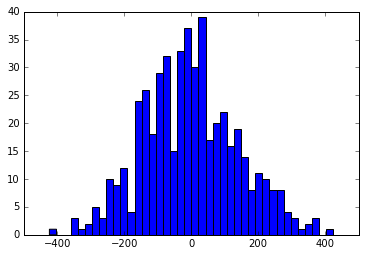

In [201]:
plt.hist(energies,bins=40)

In [202]:
energy_set = set(energies)
for e in sorted(energy_set):
    print(e,'\t',energies.count(e))

-424.0 	 1
-360.0 	 1
-344.0 	 2
-328.0 	 1
-312.0 	 1
-304.0 	 1
-296.0 	 2
-288.0 	 2
-280.0 	 1
-272.0 	 1
-256.0 	 2
-248.0 	 8
-240.0 	 2
-232.0 	 2
-224.0 	 6
-216.0 	 1
-208.0 	 1
-200.0 	 2
-192.0 	 9
-184.0 	 1
-176.0 	 3
-168.0 	 6
-160.0 	 8
-152.0 	 10
-144.0 	 8
-136.0 	 10
-128.0 	 8
-120.0 	 5
-112.0 	 13
-104.0 	 10
-96.0 	 8
-88.0 	 11
-80.0 	 9
-72.0 	 13
-64.0 	 10
-56.0 	 5
-48.0 	 10
-40.0 	 9
-32.0 	 12
-24.0 	 12
-16.0 	 18
-8.0 	 19
0.0 	 13
8.0 	 8
16.0 	 9
24.0 	 14
32.0 	 17
40.0 	 8
48.0 	 8
56.0 	 9
64.0 	 4
72.0 	 4
80.0 	 12
88.0 	 5
96.0 	 9
104.0 	 8
112.0 	 10
120.0 	 6
128.0 	 7
136.0 	 7
144.0 	 5
152.0 	 3
160.0 	 6
168.0 	 5
176.0 	 5
184.0 	 3
192.0 	 5
200.0 	 3
208.0 	 3
216.0 	 1
224.0 	 6
232.0 	 3
240.0 	 4
248.0 	 4
256.0 	 2
264.0 	 3
272.0 	 3
280.0 	 2
288.0 	 2
304.0 	 1
312.0 	 2
320.0 	 1
344.0 	 1
352.0 	 1
368.0 	 2
376.0 	 1
424.0 	 1


In [182]:
print?

In [26]:
latt.hamiltonianVars

{'J': 1, 'extfield': 0, 'mu': 0}

In [13]:
x = {'i':1,'j':2}
x

{'i': 1, 'j': 2}

In [14]:
x.values()

dict_values([1, 2])

In [27]:
x.get?

In [29]:
x.get('i')

1

In [31]:
set(x.keys())

{'i', 'j'}

In [36]:
y = {'j':1,'i':2}
y

{'i': 2, 'j': 1}

In [37]:
set(x.keys()) ^ set(y.keys())

set()

In [68]:
x.keys() == y.keys()

True

In [61]:
nx.grid_2d_graph?